### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.13.1'

### Collect Data

In [4]:
import keras

Using TensorFlow backend.


In [39]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [40]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [41]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
First 5 examples now are:  [9 0 0 3 0]


In [42]:
trainY_oh = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY_oh = tf.keras.utils.to_categorical(testY, num_classes=10)

In [43]:
print(trainY_oh.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [9 0 0 3 0]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

9
0
0
3
0
2
7
2
5
5


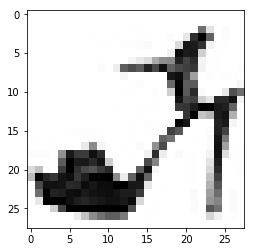

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline 
for i in range(10):
    image_index =  i
    print(trainY[image_index]) 
    plt.imshow(trainX[image_index], cmap='Greys')

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [49]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))


#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model ((We will learn about optimizers it in the next residency))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [50]:
model.fit(trainX, trainY_oh, 
          validation_data=(testX, testY_oh), 
          epochs=50,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 11us/sample - loss: 14.6384 - acc: 0.0803 - val_loss: 14.2667 - val_acc: 0.1118
Epoch 2/50
60000/60000 [==============================] - 0s 8us/sample - loss: 14.2653 - acc: 0.1124 - val_loss: 12.8182 - val_acc: 0.2024
Epoch 3/50
60000/60000 [==============================] - 0s 8us/sample - loss: 12.8146 - acc: 0.2026 - val_loss: 12.6721 - val_acc: 0.2102
Epoch 4/50
60000/60000 [==============================] - 1s 9us/sample - loss: 12.6744 - acc: 0.2101 - val_loss: 12.3903 - val_acc: 0.2247
Epoch 5/50
60000/60000 [==============================] - 1s 9us/sample - loss: 12.4316 - acc: 0.2223 - val_loss: 11.9254 - val_acc: 0.2533
Epoch 6/50
60000/60000 [==============================] - 1s 8us/sample - loss: 11.9252 - acc: 0.2528 - val_loss: 12.4220 - val_acc: 0.2178
Epoch 7/50
60000/60000 [==============================] - 0s 8us/sample - loss: 12.4412 - acc: 0.2164 - val_l

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [51]:
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

### Execute the model

In [52]:
model.fit(trainX, trainY_oh, 
          validation_data=(testX, testY_oh), 
          epochs=50,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 15us/sample - loss: 11.5949 - acc: 0.3195 - val_loss: 13.4160 - val_acc: 0.1128
Epoch 2/50
60000/60000 [==============================] - 1s 9us/sample - loss: 11.5552 - acc: 0.1129 - val_loss: 11.1935 - val_acc: 0.1148
Epoch 3/50
60000/60000 [==============================] - 1s 9us/sample - loss: 10.8210 - acc: 0.1155 - val_loss: 11.0805 - val_acc: 0.1129
Epoch 4/50
60000/60000 [==============================] - 1s 10us/sample - loss: 10.7968 - acc: 0.1133 - val_loss: 11.0271 - val_acc: 0.1137
Epoch 5/50
60000/60000 [==============================] - 1s 9us/sample - loss: 10.7877 - acc: 0.1148 - val_loss: 10.9904 - val_acc: 0.1139
Epoch 6/50
60000/60000 [==============================] - 1s 10us/sample - loss: 10.7771 - acc: 0.1154 - val_loss: 10.9328 - val_acc: 0.1104
Epoch 7/50
60000/60000 [==============================] - 1s 10us/sample - loss: 10.7635 - acc: 0.1107 - va

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [53]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd_optimizer, loss='mse')

Instructions for updating:
Use tf.cast instead.


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))
#Model compilation
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

## Review model

### Run the model